In [2]:
import pandas as pd
import nltk
# 어근으로 의미 처리
from nltk.stem.porter import PorterStemmer
# 덩이리 쪼개는 데,,정규식 이용해서...
from nltk.tokenize import RegexpTokenizer
# 불필요한 단어 제거
from nltk.corpus import stopwords


# 워드클라우드

In [3]:
f = open("data/joe.txt","r", encoding = "utf-8")
joe_lines = f.readlines()[0]
f.close()


In [4]:
joe_lines

'Chief Justice Roberts, Vice president Harris, Speaker Pelosi, Leader Schumer, Leader McConnell, Vice President Pence, and my distinguished guests, my fellow Americans. This is America’s day. This is democracy’s day. A day of history and hope of renewal and resolve through a crucible for the ages. America has been tested anew and America has risen to the challenge. Today we celebrate the triumph, not of a candidate, but of a cause, the cause of democracy. The people, the will of the people, has been heard and the will of the people has been heeded. We’ve learned again that democracy is precious. Democracy is fragile. And at this hour, my friends, democracy has prevailed.\n'

In [5]:
joe_lines[0:100]

'Chief Justice Roberts, Vice president Harris, Speaker Pelosi, Leader Schumer, Leader McConnell, Vice'

* 기본적인 전처리 수행

In [6]:
# 1) 쪼개기
tokenizer = RegexpTokenizer("[\w]+")
# 2) 지울 단어들
stop_words = stopwords.words("english")


In [7]:
# 모든 문자들을 소문자화.
joe_words = joe_lines.lower()
joe_words

'chief justice roberts, vice president harris, speaker pelosi, leader schumer, leader mcconnell, vice president pence, and my distinguished guests, my fellow americans. this is america’s day. this is democracy’s day. a day of history and hope of renewal and resolve through a crucible for the ages. america has been tested anew and america has risen to the challenge. today we celebrate the triumph, not of a candidate, but of a cause, the cause of democracy. the people, the will of the people, has been heard and the will of the people has been heeded. we’ve learned again that democracy is precious. democracy is fragile. and at this hour, my friends, democracy has prevailed.\n'

In [9]:
# 위에서 준비한 정규식 트크나이저 활용해서 쪼개기
joe_tokens = tokenizer.tokenize(joe_words)
joe_tokens

['chief',
 'justice',
 'roberts',
 'vice',
 'president',
 'harris',
 'speaker',
 'pelosi',
 'leader',
 'schumer',
 'leader',
 'mcconnell',
 'vice',
 'president',
 'pence',
 'and',
 'my',
 'distinguished',
 'guests',
 'my',
 'fellow',
 'americans',
 'this',
 'is',
 'america',
 's',
 'day',
 'this',
 'is',
 'democracy',
 's',
 'day',
 'a',
 'day',
 'of',
 'history',
 'and',
 'hope',
 'of',
 'renewal',
 'and',
 'resolve',
 'through',
 'a',
 'crucible',
 'for',
 'the',
 'ages',
 'america',
 'has',
 'been',
 'tested',
 'anew',
 'and',
 'america',
 'has',
 'risen',
 'to',
 'the',
 'challenge',
 'today',
 'we',
 'celebrate',
 'the',
 'triumph',
 'not',
 'of',
 'a',
 'candidate',
 'but',
 'of',
 'a',
 'cause',
 'the',
 'cause',
 'of',
 'democracy',
 'the',
 'people',
 'the',
 'will',
 'of',
 'the',
 'people',
 'has',
 'been',
 'heard',
 'and',
 'the',
 'will',
 'of',
 'the',
 'people',
 'has',
 'been',
 'heeded',
 'we',
 've',
 'learned',
 'again',
 'that',
 'democracy',
 'is',
 'precious',
 '

In [10]:
# 불필요한 애들 제거하기..:stop_words
joe_stopped_tokens = [i for i in list(joe_tokens) if not i in stop_words]
joe_stopped_tokens


['chief',
 'justice',
 'roberts',
 'vice',
 'president',
 'harris',
 'speaker',
 'pelosi',
 'leader',
 'schumer',
 'leader',
 'mcconnell',
 'vice',
 'president',
 'pence',
 'distinguished',
 'guests',
 'fellow',
 'americans',
 'america',
 'day',
 'democracy',
 'day',
 'day',
 'history',
 'hope',
 'renewal',
 'resolve',
 'crucible',
 'ages',
 'america',
 'tested',
 'anew',
 'america',
 'risen',
 'challenge',
 'today',
 'celebrate',
 'triumph',
 'candidate',
 'cause',
 'cause',
 'democracy',
 'people',
 'people',
 'heard',
 'people',
 'heeded',
 'learned',
 'democracy',
 'precious',
 'democracy',
 'fragile',
 'hour',
 'friends',
 'democracy',
 'prevailed']

In [11]:
# 짜르고 stop 처리하고, 길이로도 짜름
joe_stopped_tokens2 = [i for i in joe_stopped_tokens if len(i)]
joe_stopped_tokens2

['chief',
 'justice',
 'roberts',
 'vice',
 'president',
 'harris',
 'speaker',
 'pelosi',
 'leader',
 'schumer',
 'leader',
 'mcconnell',
 'vice',
 'president',
 'pence',
 'distinguished',
 'guests',
 'fellow',
 'americans',
 'america',
 'day',
 'democracy',
 'day',
 'day',
 'history',
 'hope',
 'renewal',
 'resolve',
 'crucible',
 'ages',
 'america',
 'tested',
 'anew',
 'america',
 'risen',
 'challenge',
 'today',
 'celebrate',
 'triumph',
 'candidate',
 'cause',
 'cause',
 'democracy',
 'people',
 'people',
 'heard',
 'people',
 'heeded',
 'learned',
 'democracy',
 'precious',
 'democracy',
 'fragile',
 'hour',
 'friends',
 'democracy',
 'prevailed']

* 기본적으로 지금 처리한 것들을 뭐가 몇개가 나타나는지

In [14]:
pd.Series(joe_stopped_tokens2).value_counts().head()


democracy    5
people       3
day          3
america      3
president    2
dtype: int64

## trump 연설문도

In [19]:
t = open("data/trump.txt","r", encoding = "utf-8")
trump_lines = t.readlines()[0]
t.close()

In [20]:
trump_lines

" Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans and people of the world, thank you. We, the citizens of America are now joined in a great national effort to rebuild our country and restore its promise for all of our people. Together, we will determine the course of America and the world for many, many years to come. We will face challenges. We will confront hardships, but we will get the job done. Every four years we gather on these steps to carry out the orderly and peaceful transfer of power. And we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition. They have been magnificent. Thank you. Today’s ceremony however, has very special meaning, because today, we are not merely transferring power from one administration to another or from one party to another, but we are transferring power from Washington, DC. And giving it back to you, the people. For too long, have

In [21]:
trump_lines[0:100]

' Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow'

In [22]:
#1) 쪼개기
tokenizer = RegexpTokenizer("[\w]+")
#2) 지울 단어들..
stop_words = stopwords.words("english")


In [23]:
# 모든 문자들을 소문자화를 기준으로 처리..
trump_words = trump_lines.lower()
trump_words


" chief justice roberts, president carter, president clinton, president bush, president obama, fellow americans and people of the world, thank you. we, the citizens of america are now joined in a great national effort to rebuild our country and restore its promise for all of our people. together, we will determine the course of america and the world for many, many years to come. we will face challenges. we will confront hardships, but we will get the job done. every four years we gather on these steps to carry out the orderly and peaceful transfer of power. and we are grateful to president obama and first lady michelle obama for their gracious aid throughout this transition. they have been magnificent. thank you. today’s ceremony however, has very special meaning, because today, we are not merely transferring power from one administration to another or from one party to another, but we are transferring power from washington, dc. and giving it back to you, the people. for too long, have

In [24]:
# 위에서 준비한 정규식토큰나이저 활용해서 쪼개기...
trump_tokens = tokenizer.tokenize(trump_words)
trump_tokens


['chief',
 'justice',
 'roberts',
 'president',
 'carter',
 'president',
 'clinton',
 'president',
 'bush',
 'president',
 'obama',
 'fellow',
 'americans',
 'and',
 'people',
 'of',
 'the',
 'world',
 'thank',
 'you',
 'we',
 'the',
 'citizens',
 'of',
 'america',
 'are',
 'now',
 'joined',
 'in',
 'a',
 'great',
 'national',
 'effort',
 'to',
 'rebuild',
 'our',
 'country',
 'and',
 'restore',
 'its',
 'promise',
 'for',
 'all',
 'of',
 'our',
 'people',
 'together',
 'we',
 'will',
 'determine',
 'the',
 'course',
 'of',
 'america',
 'and',
 'the',
 'world',
 'for',
 'many',
 'many',
 'years',
 'to',
 'come',
 'we',
 'will',
 'face',
 'challenges',
 'we',
 'will',
 'confront',
 'hardships',
 'but',
 'we',
 'will',
 'get',
 'the',
 'job',
 'done',
 'every',
 'four',
 'years',
 'we',
 'gather',
 'on',
 'these',
 'steps',
 'to',
 'carry',
 'out',
 'the',
 'orderly',
 'and',
 'peaceful',
 'transfer',
 'of',
 'power',
 'and',
 'we',
 'are',
 'grateful',
 'to',
 'president',
 'obama',
 'a

In [25]:
# 불필요한 애들 제거하기..:stop_words
trump_stopped_tokens = [i for i in list(trump_tokens) if not i in stop_words]
trump_stopped_tokens


['chief',
 'justice',
 'roberts',
 'president',
 'carter',
 'president',
 'clinton',
 'president',
 'bush',
 'president',
 'obama',
 'fellow',
 'americans',
 'people',
 'world',
 'thank',
 'citizens',
 'america',
 'joined',
 'great',
 'national',
 'effort',
 'rebuild',
 'country',
 'restore',
 'promise',
 'people',
 'together',
 'determine',
 'course',
 'america',
 'world',
 'many',
 'many',
 'years',
 'come',
 'face',
 'challenges',
 'confront',
 'hardships',
 'get',
 'job',
 'done',
 'every',
 'four',
 'years',
 'gather',
 'steps',
 'carry',
 'orderly',
 'peaceful',
 'transfer',
 'power',
 'grateful',
 'president',
 'obama',
 'first',
 'lady',
 'michelle',
 'obama',
 'gracious',
 'aid',
 'throughout',
 'transition',
 'magnificent',
 'thank',
 'today',
 'ceremony',
 'however',
 'special',
 'meaning',
 'today',
 'merely',
 'transferring',
 'power',
 'one',
 'administration',
 'another',
 'one',
 'party',
 'another',
 'transferring',
 'power',
 'washington',
 'dc',
 'giving',
 'back',
 

In [26]:
# 짜르고 stop 처리하고, 길이로도 짜름
trump_stopped_tokens2 = [i for i in trump_stopped_tokens if len(i)]
trump_stopped_tokens2

['chief',
 'justice',
 'roberts',
 'president',
 'carter',
 'president',
 'clinton',
 'president',
 'bush',
 'president',
 'obama',
 'fellow',
 'americans',
 'people',
 'world',
 'thank',
 'citizens',
 'america',
 'joined',
 'great',
 'national',
 'effort',
 'rebuild',
 'country',
 'restore',
 'promise',
 'people',
 'together',
 'determine',
 'course',
 'america',
 'world',
 'many',
 'many',
 'years',
 'come',
 'face',
 'challenges',
 'confront',
 'hardships',
 'get',
 'job',
 'done',
 'every',
 'four',
 'years',
 'gather',
 'steps',
 'carry',
 'orderly',
 'peaceful',
 'transfer',
 'power',
 'grateful',
 'president',
 'obama',
 'first',
 'lady',
 'michelle',
 'obama',
 'gracious',
 'aid',
 'throughout',
 'transition',
 'magnificent',
 'thank',
 'today',
 'ceremony',
 'however',
 'special',
 'meaning',
 'today',
 'merely',
 'transferring',
 'power',
 'one',
 'administration',
 'another',
 'one',
 'party',
 'another',
 'transferring',
 'power',
 'washington',
 'dc',
 'giving',
 'back',
 

In [27]:
pd.Series(trump_stopped_tokens2).value_counts().head()

america     20
american    11
people      10
country      9
one          8
dtype: int64

## 워드클라우드 만들기

In [28]:
from wordcloud import WordCloud
from collections import Counter


In [30]:
# 어떻게 표현할 것인지 설정
# font_hanapth = "c://~~~~"

joe_wordcloud = WordCloud(
    # font_apth = ~~~ 한글 워드클라우드 할때
    width=800,
    height=800,
    background_color="white"

)

trump_wordcloud = WordCloud(
    # font_apth = ~~~~ 한글 워드 클라우드 할 때...
    width=800,
    height=800,
    background_color="white"
)


In [32]:
joe_count = Counter(joe_stopped_tokens2)
joe_wordcloud = joe_wordcloud.generate_from_frequencies(joe_count)
joe_wordcloud

In [36]:
import matplotlib.pyplot as plt

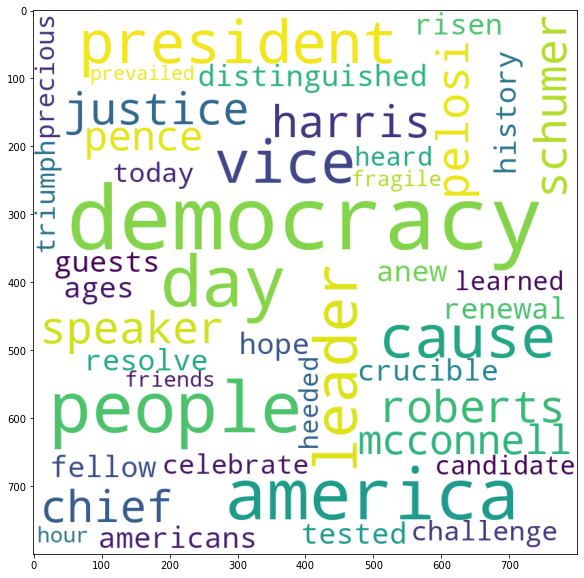

In [38]:
fig = plt.figure(figsize=(10,10))
plt.imshow(joe_wordcloud)
plt.show()

In [39]:
trump_count = Counter(trump_stopped_tokens2)
trump_wordcloud = trump_wordcloud.generate_from_frequencies(trump_count)
trump_wordcloud

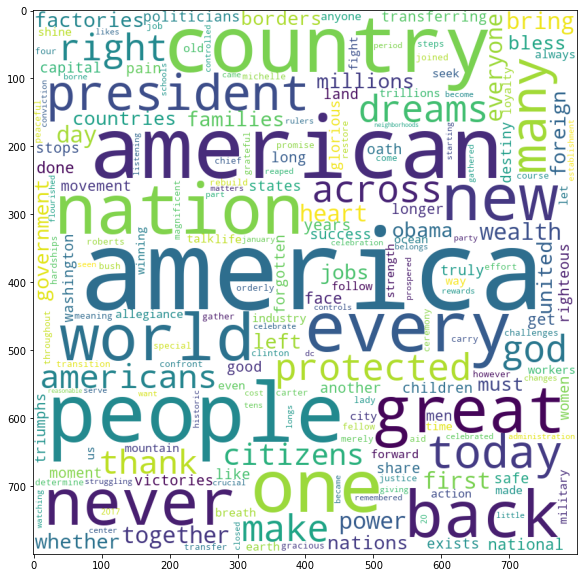

In [40]:
fig = plt.figure(figsize=(10,10))
plt.imshow(trump_wordcloud)
plt.show()

* 특정 이미지에 워드클라우드 올리기

In [41]:
# 이미지 파일을 위한 패키지
from PIL import Image
import numpy as np


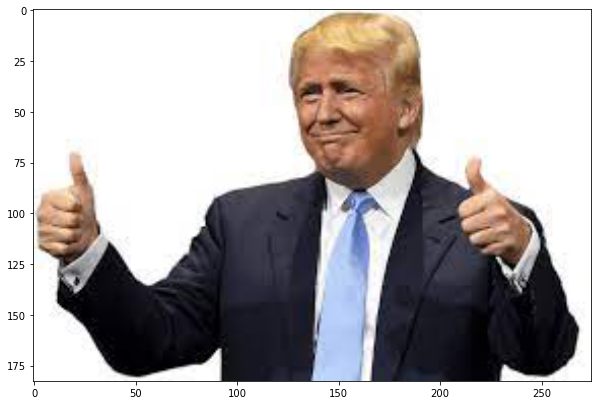

In [42]:
trump_mask = np.array(Image.open("data/trump.jpg"))
plt.figure(figsize=(10,10))
plt.imshow(trump_mask, interpolation="bilinear")
plt.show()


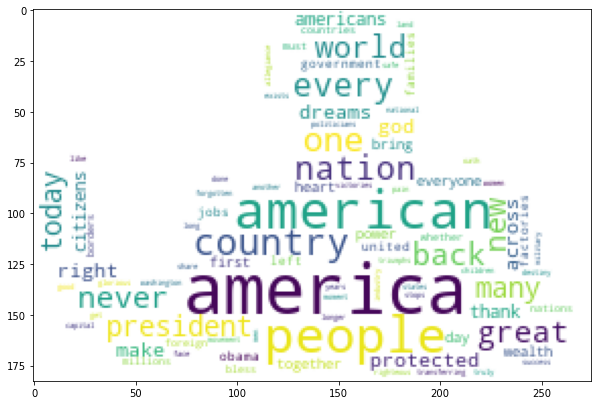

In [43]:
trump_wordcloud = WordCloud(
    # font_path = ~~~~ 한글 워드 클라우드 할 때...
    width=800,
    height=800,
    background_color="white",
    mask=trump_mask
)

trump_wordcloud = trump_wordcloud.generate_from_frequencies(trump_count)

fig = plt.figure(figsize=(10,10))
plt.imshow(trump_wordcloud)
plt.show()


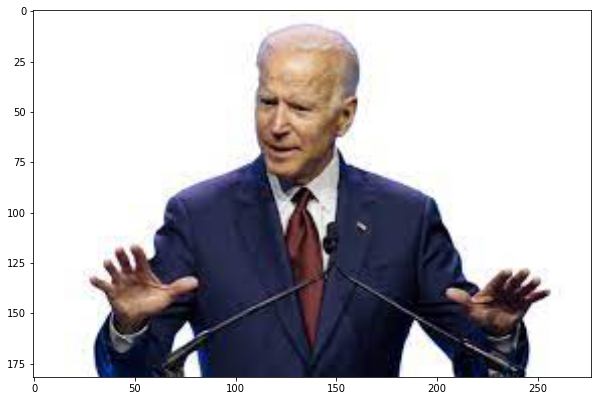

In [44]:
joe_mask = np.array(Image.open("data/joe.jpg"))
plt.figure(figsize=(10,10))
plt.imshow(joe_mask, interpolation="bilinear")
plt.show()


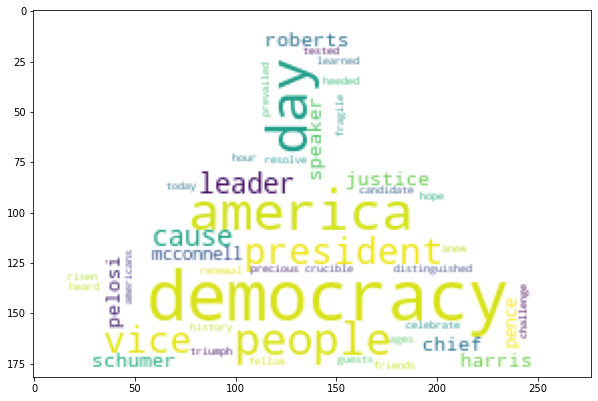

In [45]:
joe_wordcloud = WordCloud(
    # font_path = ~~~~ 한글 워드 클라우드 할 때...
    width=800,
    height=800,
    background_color="white",
    mask=joe_mask
)

joe_wordcloud = joe_wordcloud.generate_from_frequencies(joe_count)

fig = plt.figure(figsize=(10,10))
plt.imshow(joe_wordcloud)
plt.show()
